In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.tail(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1426,9950,78,30964,Petrol,110,1,1600,3,4,4,1080
1427,8950,71,29000,Petrol,86,1,1300,3,4,5,1045
1428,8450,72,26000,Petrol,86,0,1300,3,4,5,1015
1429,8950,78,24000,Petrol,86,1,1300,5,4,5,1065
1430,8450,80,23000,Petrol,86,0,1300,3,4,5,1015
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [4]:
df1 = df.copy(deep=True)

Check duplicates

In [5]:
df1.duplicated().any()  # no duplicates found

True

Checking for null values

In [6]:
df1.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

Summary statistics

In [7]:
df1.describe() 

# checking mean and std deviation and looking at min max values and trying to understand the data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


Check for outliers

<Axes: >

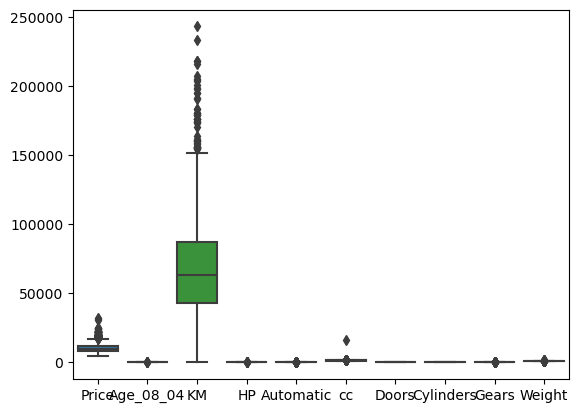

In [8]:
sns.boxplot(df1)

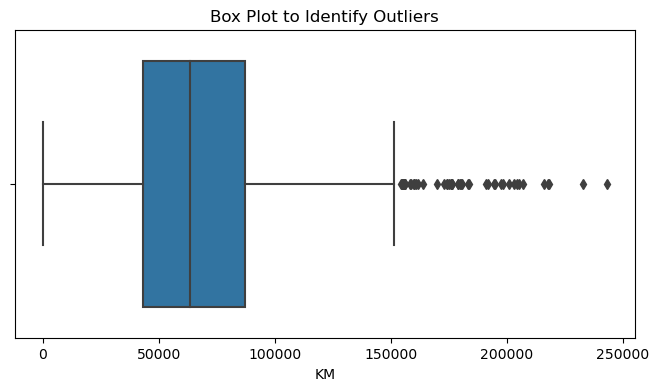

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df1['KM'])
plt.title('Box Plot to Identify Outliers')
plt.show()

In [10]:
# removing outliers in KM column

Q1 = df1['KM'].quantile(0.25)
Q3 = df1['KM'].quantile(0.75)
Q1 ,Q3

(43000.0, 87020.75)

In [11]:
IQR = Q3 - Q1
IQR

44020.75

In [12]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(-23031.125, 153051.875)

In [13]:
outliers_KM = df1[(df1['KM'] < lower_bound) | (df1['KM'] > upper_bound)]
print("Outliers based on IQR:")
print(outliers_KM)

Outliers based on IQR:
      Price  Age_08_04      KM Fuel_Type   HP  Automatic    cc  Doors  \
186    6950         43  243000    Diesel   69          0  1900      3   
187    9500         38  180638    Diesel   90          0  2000      4   
188   11950         40  179860    Diesel   90          0  2000      5   
189    7750         43  178858       CNG  110          0  1600      3   
190   11950         40  161000    Diesel   69          0  1900      3   
191    4350         44  158320    Diesel   69          0  1800      5   
378    6500         53  216000    Diesel   69          0  1900      3   
379    6400         51  198167    Diesel   69          0  1900      4   
380    7000         53  176000    Diesel   69          0  1900      3   
381    7750         54  174139    Diesel   72          0  2000      4   
382    8900         45  174000    Diesel   69          0  1900      5   
603    6950         58  205000    Diesel   72          0  2000      4   
604    7900         68  2042

In [14]:
outliers_in_KM = df1[(df1['KM'] >= lower_bound) & (df1['KM'] <= upper_bound)]
print("\nDataFrame after removing outliers:")
print(outliers_in_KM)


DataFrame after removing outliers:
      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  


In [15]:
df1=outliers_in_KM
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [16]:
df.shape

(1436, 11)

In [17]:
1436-1387  #49 ouliers are removed

49

remove outlier in cc column

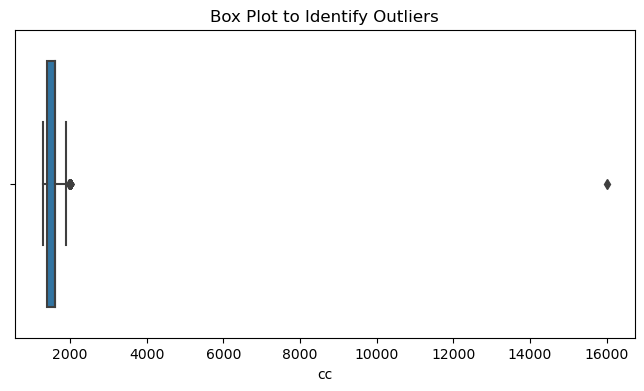

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df1['cc'])
plt.title('Box Plot to Identify Outliers')
plt.show()

In [19]:
df1['cc'].unique()  # no car has 16000 cc

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [20]:

Q1_cc = df1['cc'].quantile(0.25)
Q3_cc = df1['cc'].quantile(0.75)
Q1_cc ,Q3_cc

(1400.0, 1600.0)

In [21]:
IQR_cc = Q3_cc - Q1_cc
IQR_cc

200.0

In [22]:
lower_bound_cc = Q1_cc - 1.5 * IQR_cc
upper_bound_cc = Q3_cc + 1.5 * IQR_cc
lower_bound_cc , upper_bound_cc

(1100.0, 1900.0)

In [23]:
outliers_cc = df1[(df1['cc'] < lower_bound_cc) | (df1['cc'] > upper_bound_cc)]
print("Outliers based on IQR:")
print(outliers_cc)

Outliers based on IQR:
      Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel  90          0  2000      3   
1     13750         23  72937    Diesel  90          0  2000      3   
2     13950         24  41711    Diesel  90          0  2000      3   
3     14950         26  48000    Diesel  90          0  2000      3   
4     13750         30  38500    Diesel  90          0  2000      3   
...     ...        ...    ...       ...  ..        ...   ...    ...   
1195   8750         74  89800    Diesel  72          0  2000      3   
1202   6950         73  88186    Diesel  72          0  2000      3   
1216   8500         70  85864    Diesel  72          0  2000      5   
1320   9400         69  67092    Diesel  72          0  2000      3   
1330   8950         71  65021    Diesel  72          0  2000      3   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5   

In [24]:
outliers_in_cc = df1[(df1['cc'] >= lower_bound_cc) & (df1['cc'] <= upper_bound_cc)]
print("\nDataFrame after removing outliers:")
print(outliers_in_cc)


DataFrame after removing outliers:
      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
8     21500         27  19700    Petrol  192          0  1800      3   
9     12950         23  71138    Diesel   69          0  1900      3   
10    20950         25  31461    Petrol  192          0  1800      3   
11    19950         22  43610    Petrol  192          0  1800      3   
12    19600         25  32189    Petrol  192          0  1800      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
8             4      5    1185  
9             4      5    1105  


In [25]:
df.shape

(1436, 11)

In [26]:
1436-49

1387

In [27]:
1387-1292 # 95 ouliers removed from cc column

95

In [28]:
df1=outliers_in_cc
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


<Axes: >

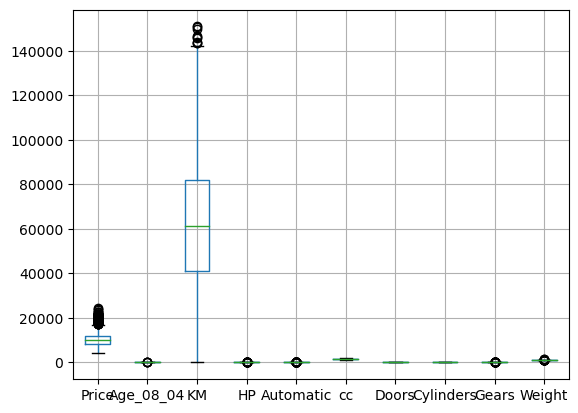

In [29]:
df1.boxplot()

remove outliers from Price column

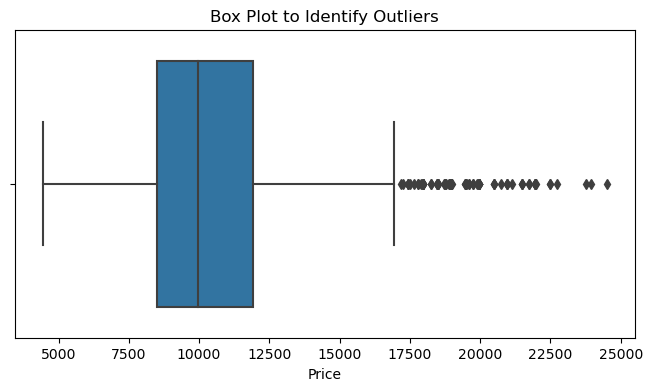

In [30]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df1['Price'])
plt.title('Box Plot to Identify Outliers')
plt.show()

In [31]:
df1['Price'].mean()

10697.722910216718

In [32]:
Q1_price = df1['Price'].quantile(0.25)
Q3_price = df1['Price'].quantile(0.75)
Q1_price ,Q3_price

(8500.0, 11906.25)

In [33]:
IQR_price = Q3_price - Q1_price
IQR_price

3406.25

In [34]:
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
lower_bound_price , upper_bound_price

(3390.625, 17015.625)

In [35]:
outliers_price = df1[(df1['Price'] < lower_bound_price) | (df1['Price'] > upper_bound_price)]
print("Outliers based on IQR:")
print(outliers_price)

Outliers based on IQR:
     Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
8    21500         27  19700    Petrol  192          0  1800      3   
10   20950         25  31461    Petrol  192          0  1800      3   
11   19950         22  43610    Petrol  192          0  1800      3   
12   19600         25  32189    Petrol  192          0  1800      3   
13   21500         31  23000    Petrol  192          0  1800      3   
..     ...        ...    ...       ...  ...        ...   ...    ...   
182  21125          2    225    Petrol   97          0  1400      5   
183  21500          2     15    Petrol  110          0  1600      5   
184  17795          1      1    Petrol   98          0  1400      4   
185  18245          1      1    Petrol  110          0  1600      5   
523  18950         49  49568    Petrol  110          0  1600      3   

     Cylinders  Gears  Weight  
8            4      5    1185  
10           4      6    1185  
11           4      6    118

In [36]:
outliers_in_price = df1[(df1['Price'] >= lower_bound_price) & (df1['Price'] <= upper_bound_price)]
print("\nDataFrame after removing outliers:")
print(outliers_in_price)


DataFrame after removing outliers:
      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
9     12950         23  71138    Diesel   69          0  1900      3   
18    16750         24  25563    Petrol  110          0  1600      3   
19    16950         30  64359    Petrol  110          0  1600      3   
20    15950         30  67660    Petrol  110          0  1600      3   
21    16950         29  43905    Petrol  110          1  1600      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
9             4      5    1105  
18            4      5    1065  


In [37]:
1387-1292   # cc outliers

95

In [38]:
1292-1205    # 87 Outliers removed from Price column

87

In [39]:
df1=outliers_in_price

Checking summary statistics after removing outliers from Price, KM, CC columns

In [40]:
df1.describe() # After , check min max values , std deviation , mean 

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.0,1205.000000,1205.000000
mean,10054.288797,58.987552,66025.068050,102.608299,0.058921,1520.750207,4.008299,4.0,5.025726,1058.624066
std,2292.303829,15.254453,27816.986034,10.904795,0.235575,136.848431,0.952317,0.0,0.191606,34.999059
min,4450.000000,13.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,49.000000,45549.000000,97.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1035.000000
50%,9750.000000,62.000000,63266.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1055.000000
75%,11250.000000,71.000000,83133.000000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1075.000000
max,16950.000000,80.000000,151000.000000,116.000000,1.000000,1900.000000,5.000000,4.0,6.000000,1615.000000


In [41]:
df.describe() # Before

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


there should correlation between the target variable and each independent variable 

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


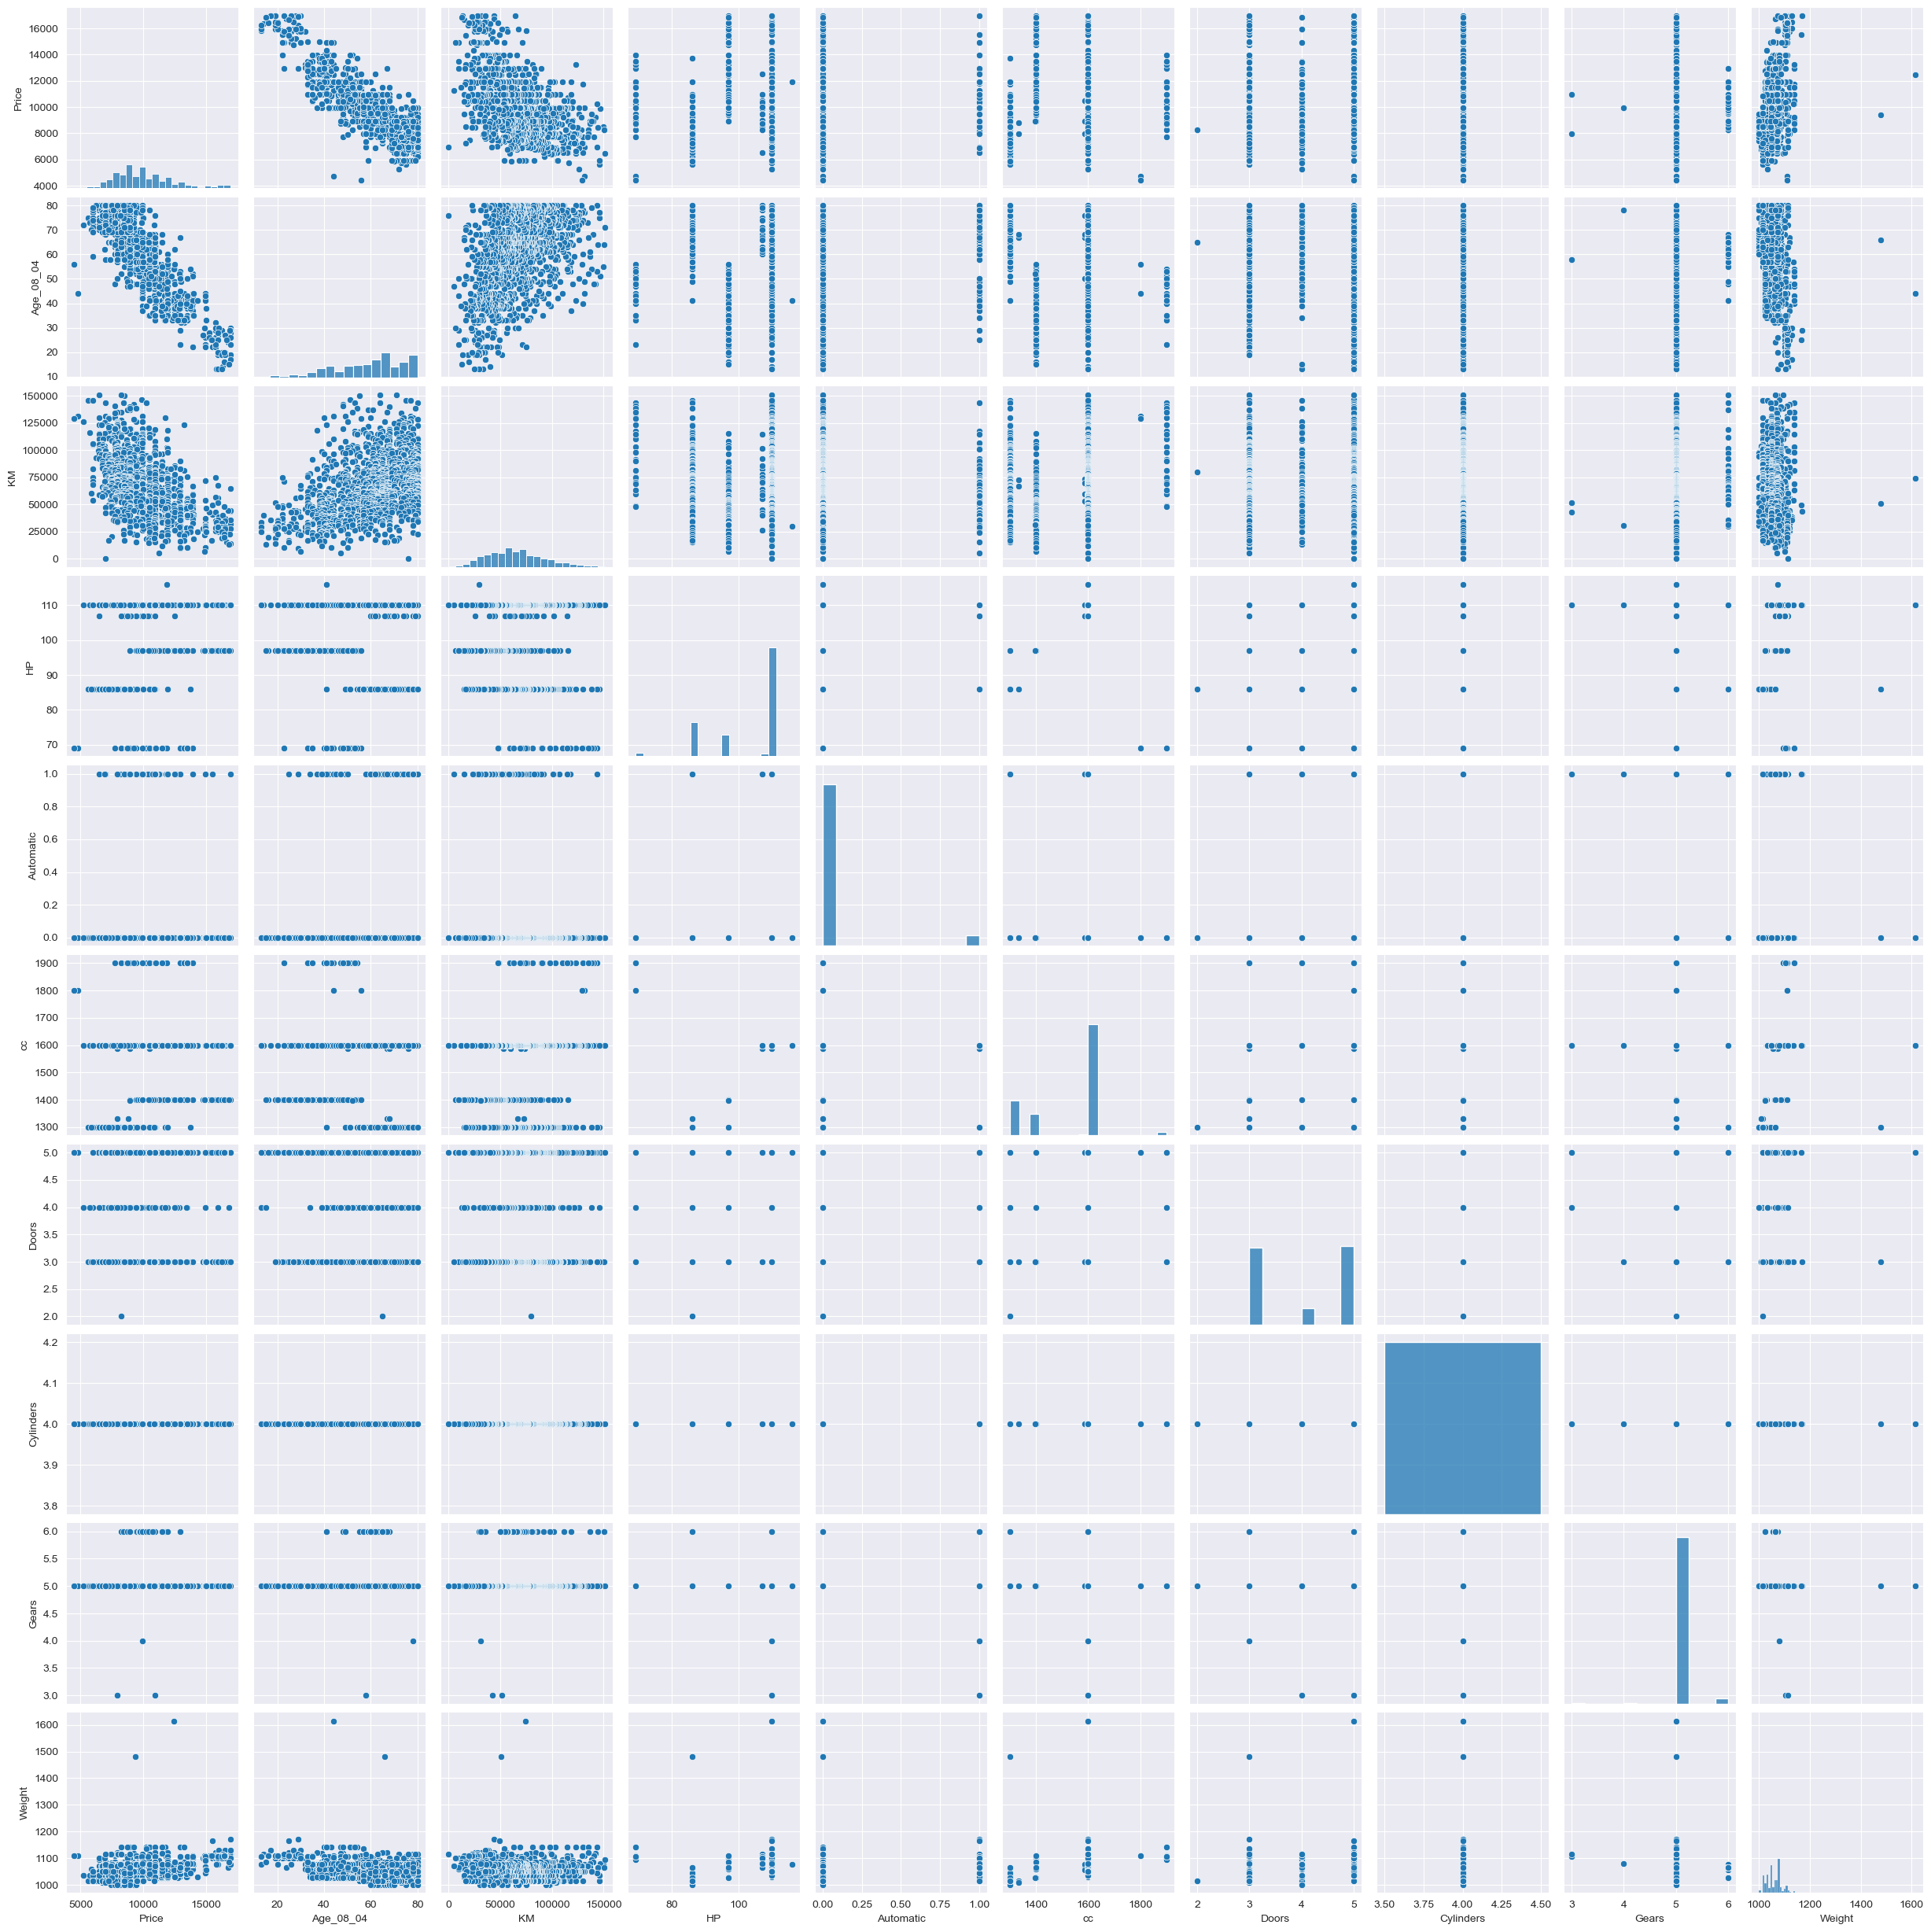

In [42]:
# checking correlation using scatterplot

sns.set_style(style='darkgrid')
sns.pairplot(df1)

# Negative correlation between Price and Age column & Negative correlation between Price and KM column
# positive corelation between Age and KM
# there is some correlation between Features so lets proceed


One hot Encoding on Fuel_Type column

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas')

In [45]:
ohetransform = ohe.fit_transform(df1[['Fuel_Type']])
ohetransform

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
9,0.0,1.0,0.0
18,0.0,0.0,1.0
19,0.0,0.0,1.0
20,0.0,0.0,1.0
21,0.0,0.0,1.0
...,...,...,...
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0
1434,0.0,0.0,1.0


In [46]:
df1= pd.concat([df1, ohetransform], axis=1).drop(columns = ['Fuel_Type'])
df1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
9,12950,23,71138,69,0,1900,3,4,5,1105,0.0,1.0,0.0
18,16750,24,25563,110,0,1600,3,4,5,1065,0.0,0.0,1.0
19,16950,30,64359,110,0,1600,3,4,5,1105,0.0,0.0,1.0
20,15950,30,67660,110,0,1600,3,4,5,1105,0.0,0.0,1.0
21,16950,29,43905,110,1,1600,3,4,5,1170,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0.0,0.0,1.0
1432,10845,72,19000,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1433,8500,71,17016,86,0,1300,3,4,5,1015,0.0,0.0,1.0
1434,7250,70,16916,86,0,1300,3,4,5,1015,0.0,0.0,1.0


2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# split data into X and y

x = df1.drop(columns=['Price'])  
y = df1['Price']

In [49]:
x.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
9,23,71138,69,0,1900,3,4,5,1105,0.0,1.0,0.0
18,24,25563,110,0,1600,3,4,5,1065,0.0,0.0,1.0
19,30,64359,110,0,1600,3,4,5,1105,0.0,0.0,1.0
20,30,67660,110,0,1600,3,4,5,1105,0.0,0.0,1.0
21,29,43905,110,1,1600,3,4,5,1170,0.0,0.0,1.0


In [50]:
y

9       12950
18      16750
19      16950
20      15950
21      16950
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1205, dtype: int64

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=42)
Y_test

229     12750
1172     7750
447     10995
237     13950
1290     8250
        ...  
972      9500
1192     6750
741     10450
975      8950
723      7950
Name: Price, Length: 362, dtype: int64

Standardization 

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()


In [54]:
X_train_scaled = scaler.fit_transform(X_train)  # Standardize training features
X_test_scaled = scaler.transform(X_test)        # Standardize test features using the same parameters

In [55]:
train_data = pd.DataFrame(X_train_scaled, columns=x.columns)
train_data['Price'] = Y_train.values 
train_data

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
0,-0.280052,-0.279528,0.691921,-0.256397,0.584288,-1.069147,0.0,-0.123008,-0.229127,-0.109566,-0.151849,0.188750,10950
1,1.360788,0.254730,0.691921,-0.256397,0.584288,1.041604,0.0,-0.123008,0.297465,-0.109566,-0.151849,0.188750,7500
2,-0.345686,-0.930168,-1.484195,-0.256397,-1.580567,1.041604,0.0,-0.123008,-0.360775,-0.109566,-0.151849,0.188750,13750
3,-0.214419,2.271490,-3.025610,-0.256397,2.027525,1.041604,0.0,-0.123008,1.350650,-0.109566,6.585470,-5.298015,4450
4,-0.345686,0.568480,0.691921,-0.256397,0.584288,1.041604,0.0,-0.123008,1.219002,-0.109566,-0.151849,0.188750,10950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1.032620,0.304000,-1.484195,-0.256397,-1.580567,-1.069147,0.0,-0.123008,-1.150663,-0.109566,-0.151849,0.188750,5950
839,1.360788,0.001279,-1.484195,-0.256397,-1.580567,-1.069147,0.0,-0.123008,-1.150663,-0.109566,-0.151849,0.188750,6750
840,0.770085,-0.251163,0.691921,-0.256397,0.584288,-0.013771,0.0,-0.123008,-0.624071,-0.109566,-0.151849,0.188750,6495
841,1.032620,2.885726,-1.484195,-0.256397,-1.580567,-1.069147,0.0,-0.123008,-1.150663,-0.109566,-0.151849,0.188750,5600


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [56]:
import statsmodels.formula.api as smf 

In [57]:
model = smf.ols('Price ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=train_data).fit()
model

In [58]:
#Coefficients
model.params

Intercept           1.000259e+04
Age_08_04          -1.768046e+03
KM                 -3.792166e+02
HP                 -9.408781e+02
Automatic           9.087288e+01
cc                  1.040016e+03
Doors               1.176994e+02
Cylinders          -7.829974e-13
Gears               7.504752e+01
Weight              2.796998e+02
Fuel_Type_CNG       2.385356e+02
Fuel_Type_Diesel   -6.922019e+02
Fuel_Type_Petrol    4.220199e+02
dtype: float64

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     330.2
Date:                Thu, 19 Dec 2024   Prob (F-statistic):          1.21e-281
Time:                        13:35:36   Log-Likelihood:                -7036.7
No. Observations:                 843   AIC:                         1.410e+04
Df Residuals:                     832   BIC:                         1.415e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept             1e+04     35.389    282.650      0.000    9933.133    1.01e+04
Age_08_04        -1768.0459     47.539    -37.192      0.000   -1861.356   -1674.736
KM                -379.2166     42.421     -8.939      0.000    -462.482    -295.952
HP                -940.8781    445.497     -2.112      0.035   -1815.308     -66.448
Automatic           90.8729     38.543      2.358      0.019      15.219     166.527
cc                1040.0155    433.319      2.400      0.017     189.488    1890.543
Doors              117.6994     39.472      2.982      0.003      40.222     195.176
Cylinders         -7.83e-13   2.78e-13     -2.814      0.005   -1.33e-12   -2.37e-13
Gears               75.0475     36.114      2.078      0.038       4.162     145.933
Weight             279.6998     45.342      6.169      0.000     190.702     368.698
Fuel_Type_CNG      238.5356     96.564      2.470      0.014      48.999     428.072
Fuel_Type_Diesel  -692.2019    259.990     -2.662      0.008   -1202.515    -181.889
Fuel_Type_Petrol   422.0199    157.484      2.680      0.008     112.908     731.132
==============================================================================
Omnibus:                        6.167   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.764
Skew:                          -0.131   Prob(JB):                       0.0340
Kurtosis:                       3.353   Cond. No.                     2.95e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
# dataframe for test data
test_data = pd.DataFrame(X_test_scaled, columns=x.columns)
test_data

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.527091,-0.096360,-0.486808,-0.256397,-0.858948,1.041604,0.0,-0.123008,0.034169,-0.109566,-0.151849,0.188750
1,1.229520,1.063921,0.691921,-0.256397,0.584288,1.041604,0.0,-0.123008,0.297465,-0.109566,-0.151849,0.188750
2,-0.673854,0.307208,-3.025610,-0.256397,2.749143,-1.069147,0.0,-0.123008,1.219002,-0.109566,6.585470,-5.298015
3,-1.592724,-0.239053,-3.025610,-0.256397,2.749143,-1.069147,0.0,-0.123008,1.350650,-0.109566,6.585470,-5.298015
4,1.229520,0.211479,0.691921,-0.256397,0.584288,-0.013771,0.0,-0.123008,-0.624071,-0.109566,-0.151849,0.188750
...,...,...,...,...,...,...,...,...,...,...,...,...
357,0.441917,-0.681042,0.691921,-0.256397,0.584288,-1.069147,0.0,-0.123008,-0.229127,-0.109566,-0.151849,0.188750
358,1.163887,0.860245,-1.484195,-0.256397,-1.580567,-1.069147,0.0,-0.123008,-1.150663,-0.109566,-0.151849,0.188750
359,0.179383,0.587078,0.691921,-0.256397,0.584288,-1.069147,0.0,5.976726,0.165817,-0.109566,-0.151849,0.188750
360,0.376284,-0.689079,-1.484195,-0.256397,-1.580567,-1.069147,0.0,-0.123008,-1.150663,-0.109566,-0.151849,0.188750


In [61]:
y_pred = model.predict(test_data)
y_pred  # predicting the price in euros

0      12562.062900
1       7713.841691
2      10145.489088
3      12014.067035
4       7655.131219
           ...     
357     9372.357336
358     7049.624371
359     9923.873662
360     9029.672285
361     8931.915776
Length: 362, dtype: float64

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae, mse

(797.1151998891091, 1086381.73298481)

In [64]:
Y_test.shape, y_pred.shape

((362,), (362,))

In [65]:
y_pred

0      12562.062900
1       7713.841691
2      10145.489088
3      12014.067035
4       7655.131219
           ...     
357     9372.357336
358     7049.624371
359     9923.873662
360     9029.672285
361     8931.915776
Length: 362, dtype: float64

In [66]:
df1.columns


Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

VIF

In [67]:


# Calculate VIF for each variable
rsq_age = smf.ols('Age_08_04 ~ KM + HP + Automatic + cc + Doors + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_age = 1 / (1 - rsq_age) 

rsq_km = smf.ols('KM ~ Age_08_04 + HP + Automatic + cc + Doors + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_km = 1 / (1 - rsq_km) 

rsq_hp = smf.ols('HP ~ Age_08_04 + KM + Automatic + cc + Doors + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_hp = 1 / (1 - rsq_hp) 

rsq_automatic = smf.ols('Automatic ~ Age_08_04 + KM + HP + cc + Doors + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_automatic = 1 / (1 - rsq_automatic) 

rsq_cc = smf.ols('cc ~ Age_08_04 + KM + HP + Automatic + Doors + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_cc = 1 / (1 - rsq_cc) 

rsq_doors = smf.ols('Doors ~ Age_08_04 + KM + HP + Automatic + cc + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_doors = 1 / (1 - rsq_doors) 

rsq_cylinders = smf.ols('Cylinders ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_cylinders = 1 / (1 - rsq_cylinders) 

rsq_gears = smf.ols('Gears ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Cylinders + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_gears = 1 / (1 - rsq_gears) 

rsq_weight = smf.ols('Weight ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Cylinders + Gears + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_weight = 1 / (1 - rsq_weight) 

rsq_fuel_cng = smf.ols('Fuel_Type_CNG ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Cylinders + Gears + Weight + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_fuel_cng = 1 / (1 - rsq_fuel_cng)

rsq_fuel_diesel = smf.ols('Fuel_Type_Diesel ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Petrol', data=df1).fit().rsquared  
vif_fuel_diesel = 1 / (1 - rsq_fuel_diesel)

rsq_fuel_petrol = smf.ols('Fuel_Type_Petrol ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel', data=df1).fit().rsquared  
vif_fuel_petrol = 1 / (1 - rsq_fuel_petrol)

d1 = {'Variables':['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],'VIF':[vif_age, vif_km,vif_hp,vif_automatic,vif_cc,vif_doors,vif_cylinders,vif_gears,vif_weight,vif_fuel_cng,vif_fuel_diesel,vif_fuel_petrol]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\dell\AppData\Local\Temp\ipykernel_19884\2396118722.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  vif_fuel_cng = 1 / (1 - rsq_fuel_cng)
C:\Users\dell\AppData\Local\Temp\ipykernel_19884\2396118722.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  vif_fuel_diesel = 1 / (1 - rsq_fuel_diesel)
C:\Users\dell\AppData\Local\Temp\ipykernel_19884\2396118722.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  vif_fuel_petrol = 1 / (1 - rsq_fuel_petrol)


,Variables,VIF
0,Age_08_04,1.768490
1,KM,1.441235
2,HP,133.238294
3,Automatic,1.172037
4,cc,124.794915
5,Doors,1.274811
6,Cylinders,0.000000
7,Gears,1.070255
8,Weight,1.798182
9,Fuel_Type_CNG,inf


In [68]:
df1['HP'].unique()

array([ 69, 110,  97, 116,  86, 107], dtype=int64)

In [69]:
df1['cc'].unique()

array([1900, 1600, 1400, 1800, 1598, 1398, 1300, 1587, 1332], dtype=int64)

Dropping HP and cc column due to high vif score

second model

In [70]:
model_drop_hp_cc = smf.ols('Price ~ Age_08_04 + KM  + Automatic  + Cylinders + Gears + Weight + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol', data=train_data).fit()
model_drop_hp_cc
#both hp and cc dropped

In [71]:
model_drop_hp_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     456.3
Date:                Thu, 19 Dec 2024   Prob (F-statistic):          2.54e-280
Time:                        13:35:39   Log-Likelihood:                -7049.0
No. Observations:                 843   AIC:                         1.411e+04
Df Residuals:                     835   BIC:                         1.415e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept             1e+04     35.845    279.050      0.000    9932.237    1.01e+04
Age_08_04        -1717.6851     43.265    -39.701      0.000   -1802.607   -1632.764
KM                -364.2068     42.852     -8.499      0.000    -448.318    -280.096
Automatic          101.2474     36.582      2.768      0.006      29.444     173.051
Cylinders        -1.698e-13   7.38e-15    -23.017      0.000   -1.84e-13   -1.55e-13
Gears               65.6990     35.984      1.826      0.068      -4.931     136.329
Weight             378.9154     39.406      9.616      0.000     301.570     456.261
Fuel_Type_CNG       36.0507     30.968      1.164      0.245     -24.733      96.834
Fuel_Type_Diesel  -123.3555     26.702     -4.620      0.000    -175.766     -70.944
Fuel_Type_Petrol    79.0434     20.060      3.940      0.000      39.669     118.418
==============================================================================
Omnibus:                       26.067   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.248
Skew:                          -0.250   Prob(JB):                     6.70e-10
Kurtosis:                       3.976   Cond. No.                     2.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

3rd model using sklearn 

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
# Fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [74]:
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_linear

array([12562.06289953,  7713.84169111, 10145.48908824, 12014.06703535,
        7655.13121893,  9489.72475815,  9907.46106642, 15093.63641291,
        9112.91278463,  7528.52944136, 11994.41167408,  7836.26474029,
       12967.53578157,  9765.57873973,  7864.3666679 , 11138.65266217,
        9526.88050328,  7304.75333561, 11037.18034336, 10566.38573264,
       11283.00228631,  7686.74581092,  9294.09268076,  8935.80557118,
        9411.30508397, 12306.68756594, 11960.96830952,  9527.09481109,
        8861.0259312 , 11663.2706144 , 10187.71412697, 10151.05412503,
       10304.03180861, 10338.39528255, 13700.45089648,  9178.28029147,
       10810.62116565, 14324.5749399 ,  9587.04702991,  7772.02055372,
        8270.35909329,  7808.56899634,  8312.06371945, 11896.70173139,
        8432.5467942 , 11975.33256965,  9219.27247286, 12200.0049228 ,
        8219.09999054, 10297.88785   , 13487.48742484,  6885.60928469,
        9685.02561699,  8303.80968877,  9333.94949055, 10906.36598526,
      

In [75]:
# Create a DataFrame for actual and predicted prices
results_df = pd.DataFrame({
    'Actual Price': Y_test,
    'Predicted Price': y_pred_linear
})
results_df

,Actual Price,Predicted Price
229,12750,12562.062900
1172,7750,7713.841691
447,10995,10145.489088
237,13950,12014.067035
1290,8250,7655.131219
...,...,...
972,9500,9372.357336
1192,6750,7049.624371
741,10450,9923.873662
975,8950,9029.672285


In [76]:
print('sqrt' in dir(np))

True


In [77]:
# calculate the acuuracy metrics
mae1 = mean_absolute_error(Y_test, y_pred_linear )
mse1 = mean_squared_error(Y_test, y_pred_linear )
rmse1 = np.sqrt(mse1)
r2_score = r2_score(Y_test, y_pred_linear)

In [78]:
# Print the accuracy metrics
print("\nAccuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse1:.2f}")
print(f"R-squared (R²): {r2_score:.2f}")


Accuracy Metrics:
Mean Absolute Error (MAE): 797.12
Mean Squared Error (MSE): 1086381.73
Root Mean Squared Error (RMSE): 1042.30
R-squared (R²): 0.80


MAE - models predictions are off by about 797.12 units from the actual values
MSE - MSE measures the average of squares of the errors, the average squared difference between the predicted and actual values
      MSE is sensitive to outliers
RMSE - An RMSE of 1,042.30 means that, on average, the model's predictions deviate from the actual values by about 1,042.30
R2 - It is the variation explain by our model and 0.80 seem good

5.Apply Lasso and Ridge methods on the model.

In [80]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [81]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust alpha as needed
lasso.fit(train_data, Y_train)


Lasso(alpha=0.1)

In [82]:
#x_train =  X_train_scaled , x_test = X_test_scaled, 
#X_train_scaled = scaler.fit_transform(X_train)  # Standardize training features
#X_test_scaled = scaler.transform(X_test)

In [83]:


lasso = Lasso(alpha = 1) 
lasso.fit(X_train_scaled, Y_train) 
y_pred1 = lasso.predict(X_test_scaled)


In [84]:
mean_squared_error = np.mean((y_pred1 - Y_test)**2) 
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 1095878.0411978457


In [85]:


lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] =['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol'] 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

             Columns  Coefficient Estimate
0          Age_08_04          -1745.899565
1                 KM           -378.156380
2                 HP           -483.387330
3          Automatic            103.018425
4                 cc            595.768491
5              Doors            120.008311
6          Cylinders              0.000000
7              Gears             75.585771
8             Weight            277.268401
9      Fuel_Type_CNG             -0.000000
10  Fuel_Type_Diesel           -623.808808
11  Fuel_Type_Petrol             17.665186


ridge

In [86]:
# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train_scaled, Y_train) 
y_pred2 = ridgeR.predict(X_test_scaled) 

In [87]:

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred2 - Y_test)**2) 
print(mean_squared_error_ridge) 

1092898.7101844805


In [88]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= ['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol']
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


#Coefficient: -1749.53
#Interpretation: For each additional year in the age of the car, the price decreases by approximately $1,749.53, holding all other variables constant.

             Columns  Coefficient Estimate
0          Age_08_04          -1749.526748
1                 KM           -379.645994
2                 HP           -602.783313
3          Automatic            100.283903
4                 cc            711.254197
5              Doors            120.156348
6          Cylinders              0.000000
7              Gears             76.287131
8             Weight            278.734361
9      Fuel_Type_CNG            168.737899
10  Fuel_Type_Diesel           -495.002938
11  Fuel_Type_Petrol            302.886399
